In [7]:
#Task1

def Infix2Postfix(infix):
    precedence = {
        '~': 4,  # NOT
        '&': 3,  # AND
        '|': 2,  # OR
        '>': 1,  # IMPLIES
        '=': 0   # IFF
    }
    right_associative = {'~'}  # Only NOT is right-associative

    def is_operator(c):
        return c in precedence

    def is_operand(c):
        return c.isalpha() and c.isupper()  # A-Z

    output = []
    stack = []

    for token in infix:
        if token == ' ':
            continue
        elif is_operand(token):
            output.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()  # Remove '('
        elif is_operator(token):
            while (stack and stack[-1] != '(' and
                   ((precedence[token] < precedence[stack[-1]]) or
                    (precedence[token] == precedence[stack[-1]] and token not in right_associative))):
                output.append(stack.pop())
            stack.append(token)

    while stack:
        output.append(stack.pop())

    return ''.join(output)

import itertools

def Postfix2Truthtable(postfix):
    operators = {'~', '&', '|', '>', '='}

    # Extract unique variables from the postfix expression
    variables = sorted(set(filter(str.isalpha, postfix)))

    # Generate all possible combinations of truth values (0 = False, 1 = True)
    combinations = list(itertools.product([0, 1], repeat=len(variables)))

    def eval_postfix(expr, values):
        stack = []
        env = dict(zip(variables, values))

        for token in expr:
            if token.isalpha():
                stack.append(env[token])
            elif token == '~':
                a = stack.pop()
                stack.append(int(not a))
            elif token == '&':
                b = stack.pop()
                a = stack.pop()
                stack.append(a & b)
            elif token == '|':
                b = stack.pop()
                a = stack.pop()
                stack.append(a | b)
            elif token == '>':
                b = stack.pop()
                a = stack.pop()
                stack.append(int((not a) | b))
            elif token == '=':
                b = stack.pop()
                a = stack.pop()
                stack.append(int(a == b))
        return stack[0]

    # Print header
    header = ' | '.join(variables) + ' | Result'
    line = '-' * len(header)
    print(header)
    print(line)

    for combo in combinations:
        result = eval_postfix(postfix, combo)
        row = ' | '.join(str(val) for val in combo) + f' |   {result}'
        print(row)

print("\nTest 1: R|(P&Q)")
Postfix2Truthtable("RPQ&|")

print("\nTest 2: ~P|(Q&R)>R")
Postfix2Truthtable("P~QR&|R>")

print("\nTest 3: P|(R&Q)")
Postfix2Truthtable("PRQ&|")

print("\nTest 4: (P>Q)&(Q>R)")
Postfix2Truthtable("PQ>QR>&")

print("\nTest 5: (P|~Q)>~P")
Postfix2Truthtable("PQ~|P~>")


Test 1: R|(P&Q)
P | Q | R | Result
------------------
0 | 0 | 0 |   0
0 | 0 | 1 |   1
0 | 1 | 0 |   0
0 | 1 | 1 |   1
1 | 0 | 0 |   0
1 | 0 | 1 |   1
1 | 1 | 0 |   1
1 | 1 | 1 |   1

Test 2: ~P|(Q&R)>R
P | Q | R | Result
------------------
0 | 0 | 0 |   0
0 | 0 | 1 |   1
0 | 1 | 0 |   0
0 | 1 | 1 |   1
1 | 0 | 0 |   1
1 | 0 | 1 |   1
1 | 1 | 0 |   1
1 | 1 | 1 |   1

Test 3: P|(R&Q)
P | Q | R | Result
------------------
0 | 0 | 0 |   0
0 | 0 | 1 |   0
0 | 1 | 0 |   0
0 | 1 | 1 |   1
1 | 0 | 0 |   1
1 | 0 | 1 |   1
1 | 1 | 0 |   1
1 | 1 | 1 |   1

Test 4: (P>Q)&(Q>R)
P | Q | R | Result
------------------
0 | 0 | 0 |   1
0 | 0 | 1 |   1
0 | 1 | 0 |   0
0 | 1 | 1 |   1
1 | 0 | 0 |   0
1 | 0 | 1 |   0
1 | 1 | 0 |   0
1 | 1 | 1 |   1

Test 5: (P|~Q)>~P
P | Q | Result
--------------
0 | 0 |   1
0 | 1 |   1
1 | 0 |   0
1 | 1 |   0


In [14]:
#Task2
import csv
import random

def is_passing(student):
    return all(int(score) >= 5 for score in student[3:])

def is_high_math(student):
    return int(student[3]) >= 9

def is_struggling(student):
    return student[3] < 6 and student[4] < 6

def improved_in_cs(student):
    return student[4] > student[3]

def load_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        return list(reader)

# Universal Quantifications
def all_students_passed(students):
    return all(is_passing(student) for student in students)

def all_students_math_above_3(students):
        return all(int(student[3]) > 3 for student in students)

# Existential Quantifications
def exists_student_high_math(students):
    return any(is_high_math(student) for student in students)

def exists_student_improved_cs(students):
    return any(improved_in_cs(student) for student in students)

# Combined/Nested Statements
def for_all_exists_subject_above_6(students):
        return all(any(int(score) > 6 for score in student[3:]) for student in students)

def for_all_math_below_6_exists_subject_above_6(students):
        return all(any(int(score) > 6 for score in student[3:]) for student in students if int(student[3]) < 6)

# Negations
def not_all_students_passed(students):
    # Meaning: "There exists at least one student who did not pass all subjects."
    return not all_students_passed(students)

def not_all_students_math_above_3(students):
    # Meaning: "There exists at least one student with a math score less than or equal to 3."
    return not all_students_math_above_3(students)

def not_exists_student_high_math(students):
    # Meaning: "No student scored above 9 in math."
    return not exists_student_high_math(students)

def not_exists_student_improved_cs(students):
    # Meaning: "No student improved in CS over Math."
    return not exists_student_improved_cs(students)

def not_for_all_exists_subject_above_6(students):
    # Meaning: "There exists at least one student who did not score above 6 in any subject."
    return not for_all_exists_subject_above_6(students)

def not_for_all_math_below_6_exists_subject_above_6(students):
    # Meaning: "There exists at least one student scoring below 6 in Math who did not score above 6 in any other subject."
    return not for_all_math_below_6_exists_subject_above_6(students)

# Generate random student data
data = []
for i in range(20):
    student_id = f"S{i+1:03}"
    student_name = f"Student {i+1}"
    day_of_birth = f"200{random.randint(0, 9)}-{random.randint(1, 12):02}-{random.randint(1, 28):02}"
    math_score = random.randint(0, 10)
    cs_score = random.randint(0, 10)
    eng_score = random.randint(0, 10)
    data.append([student_id, student_name, day_of_birth, math_score, cs_score, eng_score])

# Write data to CSV file
with open('students.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["StudentID", "StudentName", "DayOfBirth", "Math", "CS", "Eng"])
    writer.writerows(data)

print("Dataset 'students.csv' created successfully.\n")

students = load_data('students.csv')

# Test the functions
print("All students passed all subjects:", all_students_passed(students))
print("All students have a math score higher than 3:", all_students_math_above_3(students))
print("There exists a student who scored above 9 in math:", exists_student_high_math(students))
print("There exists a student who improved in CS over Math:", exists_student_improved_cs(students))
print("For every student, there exists a subject in which they scored above 6:", for_all_exists_subject_above_6(students))
print("For every student scoring below 6 in Math, there exists a subject where they scored above 6:", for_all_math_below_6_exists_subject_above_6(students))

# Test the negations
print("\nNegations:")
print("Not all students passed all subjects:", not_all_students_passed(students))
print("Not all students have a math score higher than 3:", not_all_students_math_above_3(students))
print("No student scored above 9 in math:", not_exists_student_high_math(students))
print("No student improved in CS over Math:", not_exists_student_improved_cs(students))
print("There exists at least one student who did not score above 6 in any subject:", not_for_all_exists_subject_above_6(students))
print("There exists at least one student scoring below 6 in Math who did not score above 6 in any other subject:", not_for_all_math_below_6_exists_subject_above_6(students))

Dataset 'students.csv' created successfully.

All students passed all subjects: False
All students have a math score higher than 3: False
There exists a student who scored above 9 in math: True
There exists a student who improved in CS over Math: True
For every student, there exists a subject in which they scored above 6: False
For every student scoring below 6 in Math, there exists a subject where they scored above 6: False

Negations:
Not all students passed all subjects: True
Not all students have a math score higher than 3: True
No student scored above 9 in math: False
No student improved in CS over Math: False
There exists at least one student who did not score above 6 in any subject: True
There exists at least one student scoring below 6 in Math who did not score above 6 in any other subject: True


Original message: This is a secret message!
Encrypted message: [b'xB\x04[\xedFsd\x16\x90\x02N\x90\xcd\x82\x9a\xd3\x08+n\xf5$\x15*\xaf][\xf7\xbcW\xb52\xaa&h\x03\xbe\xb8\xff\xd2|\xeao\xba\xbe\x86\xd1\x93\xc5\x073\x18\xf3>\x84\xb7\x8a\xec\xc9\xfd\xef:q\x02\xf1q\x07\t\xcb\xcdWb@n\xe8&\x1e2\xd9\xd1\xa4\xb8\xcc\x8d\xf4\x1d\x92\xe1\xafn!\x82\xf1\xd0J\xdf\x8d\xa5\x92E\xa1&\xa7\x0e\nz)y\xe8+\x96\xb9!\xb1\xebM\xee\xd2\xdc-;\x95\xd0g\x8b\x05\xd9\x15\xdb\x10\x85A\xde\x80_\x06L+\x02\xb4\x8b\x0f\xa2\xa0\x12\xcc#}\xb2?g\xef\xb0\x81\x05\xb5?\x0f\xe3tj\xeb\xb3\x82\x80Soh\xff\x14>\xc1B0\xd5\xa4k\x1b\xee\xea\x98\xa2\x83\xfb\x9a\xcb)\x13\x91\xcb\xe5\xe9b\x1ddO\xcfQ\xc1\x8e\t\\s\xa1\xb3\xe3m\xc5*\xe31\xa7Z\xe9\xc5v\xf0T\x13\x13\xbd#\xfdC\xc9p\xea\x16\xdd<\xca\xd2\x95\xfe[\xc7\xd5\x81D \xd8<3TGFoJx\xb3\xa7\x13*:Z\x97']
Decrypted message: This is a secret message!


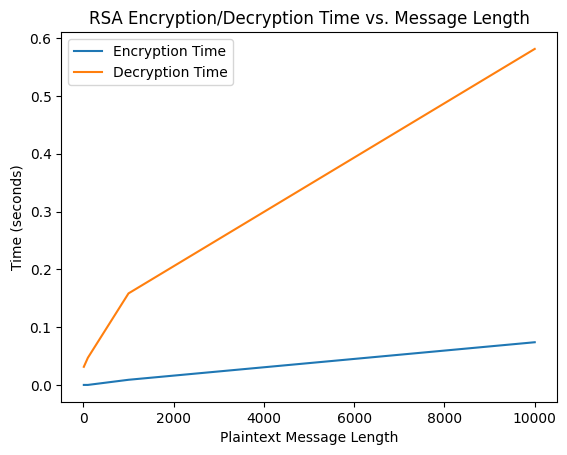

In [25]:
#Task3
import rsa
import time
import matplotlib.pyplot as plt

def generate_keys():
    """Generates public and private keys using RSA."""
    (pubkey, privkey) = rsa.newkeys(2048) # Generate 2048-bit keys
    return pubkey, privkey

def encrypt(message, pubkey, chunk_size=245):
    ciphertext_chunks = []
    for i in range(0, len(message), chunk_size):
        chunk = message[i:i + chunk_size]
        ciphertext_chunk = rsa.encrypt(chunk.encode('utf-8'), pubkey)
        ciphertext_chunks.append(ciphertext_chunk)
    return ciphertext_chunks

def decrypt(ciphertext, privkey):
    decrypted_chunks = []
    for chunk in ciphertext:
        decrypted_chunk = rsa.decrypt(chunk, privkey).decode('utf-8')
        decrypted_chunks.append(decrypted_chunk)
    return ''.join(decrypted_chunks)

# Example usage
pubkey, privkey = generate_keys()
message = "This is a secret message!"
ciphertext = encrypt(message, pubkey)
decrypted_message = decrypt(ciphertext, privkey)

print("Original message:", message)
print("Encrypted message:", ciphertext)
print("Decrypted message:", decrypted_message)

message_lengths = [10, 100, 1000, 10000]
encryption_times = []
decryption_times = []

for length in message_lengths:
    message = 'a' * length

    start_time = time.time()
    ciphertext = encrypt(message, pubkey)
    encryption_times.append(time.time() - start_time)

    start_time = time.time()
    decrypted_message = decrypt(ciphertext, privkey)
    decryption_times.append(time.time() - start_time)

plt.plot(message_lengths, encryption_times, label='Encryption Time')
plt.plot(message_lengths, decryption_times, label='Decryption Time')
plt.xlabel('Plaintext Message Length')
plt.ylabel('Time (seconds)')
plt.title('RSA Encryption/Decryption Time vs. Message Length')
plt.legend()
plt.show()